Beginning training.
Training using 0% unlabeled data.
10 epochs passed.
20 epochs passed.
30 epochs passed.
Training finished.

Summary of training


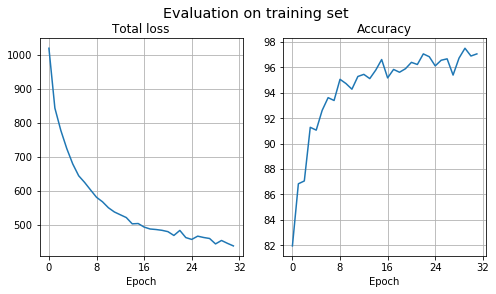

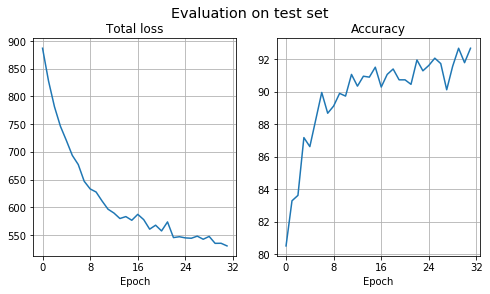

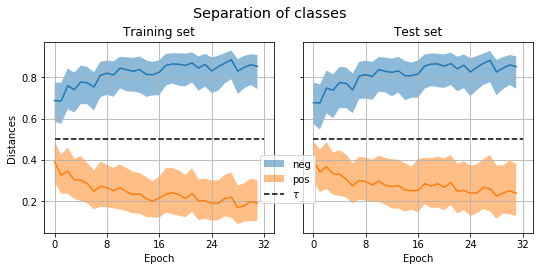

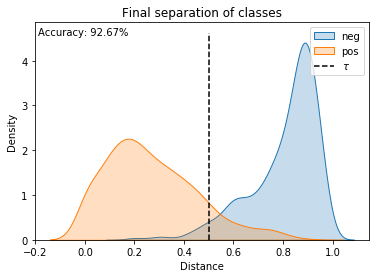

Maximal accuracy: 92.67% (epoch 29).


In [15]:
T = 0.5
# logs

train_log = {
    "total_loss": [],  # total loss
    "accuracy": [],  # accuracy
    "pos_dists": [],  # predicted distances between positive pairs
    "neg_dists": [],  # predicted distances between negative pairs
}

test_log = {
    "total_loss": [],
    "accuracy": [],
    "pos_dists": [],
    "neg_dists": [],
}

print("Beginning training.")
trainset = dataset.trainset # torch.load("cl/new_trainset.pkl")
weight_decays = [3]
Es = [32]
dp = 1 / 90
p = 0
i = 0

while p <= 0:
    trainset = relabel(p)
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
    net = PseudolabelSNN().to(device)
    optimizer = torch.optim.Adam(net.parameters(), weight_decay=weight_decays[i])
    print(f"Training using {p:.0%} unlabeled data.")
    train(Es[i])
    p += dp
    i += 1

print("Training finished.\n")
show_results()
